Decision tree

Class of data


In [29]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#load the data
df=pd.read_csv("Trump_fb_statuses_cleaned.csv")
sns.set_theme()
df.head()


,Unnamed: 0,status_message,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,Beautiful evening in Wisconsin- THANK YOU for ...,photo,10/17/2016 20:56:51,6813,543,359,6178,572,39,17,0,7
1,1,The State Department's quid pro quo scheme pro...,video,10/17/2016 18:00:41,33768,3644,17653,26649,487,1155,75,191,5211
2,2,Crooked Hillary's State Department colluded wi...,video,10/17/2016 15:34:46,85627,8810,32594,73519,2943,1020,330,263,7552
3,3,"JournoCash: Media gives $382,000 to Clinton, $...",link,10/17/2016 14:17:24,22696,3665,5082,14029,122,2091,241,286,5927
4,4,"Exclusive: ""O'Keefe Video Sting Exposes 'Bird-...",link,10/17/2016 12:03:19,40729,4905,17087,26472,178,2588,154,417,10922


Data cleaning part

In [30]:
# average number of the column "num_reactions"
df["num_reactions"].mean()
# add a new column "label" to the dataframe, if the number of reactions is greater than the average, then the label is 1, otherwise the label is 0
df["label"]=df["num_reactions"].apply(lambda x: 1 if x>df["num_reactions"].mean() else 0)
# drop the column "num_reactions"
df.drop("num_reactions",axis=1,inplace=True)
# drop the column "status_message" and "status_published" and "status_type"
df.drop(["status_message","status_published","status_type"],axis=1,inplace=True)
df.head()

,Unnamed: 0,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,label
0,0,543,359,6178,572,39,17,0,7,0
1,1,3644,17653,26649,487,1155,75,191,5211,0
2,2,8810,32594,73519,2943,1020,330,263,7552,1
3,3,3665,5082,14029,122,2091,241,286,5927,0
4,4,4905,17087,26472,178,2588,154,417,10922,0


These are the 8 features selected to train the model. They are all attributes that are allowed to get and reflect the character of accounts.

In [31]:
X=df.drop(columns=["label"],axis=1)
y=df["label"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Use a baseline model for comparsion

In [32]:
#define a baseline model which random assign labels
def random_classifier(y_data):
    ypred=[]
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))
    print("-----RANDOM CLASSIFIER-----")
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data,ypred))

random_classifier(df.label)

-----RANDOM CLASSIFIER-----
accuracy 0.5101502768257317
percision, recall, fscore, (array([0.61163032, 0.40546331]), array([0.51486014, 0.50299003]), array([0.55908875, 0.4489917 ]), array([2288, 1505]))


We can see that the accuracy of the baseline model is around 50%, as its only method is to guess. So if we have a better accuracy with our model, then it means that our model is good.

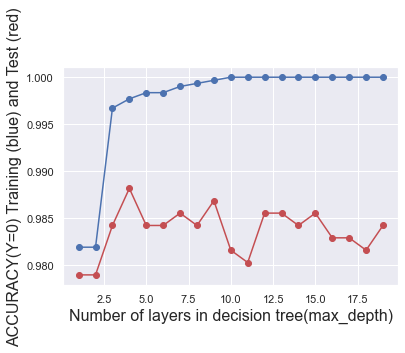

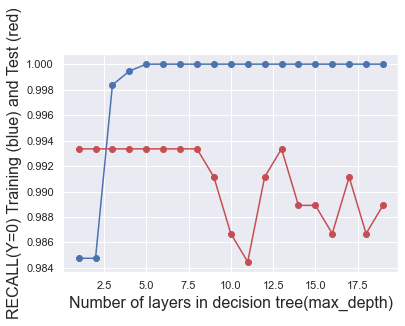

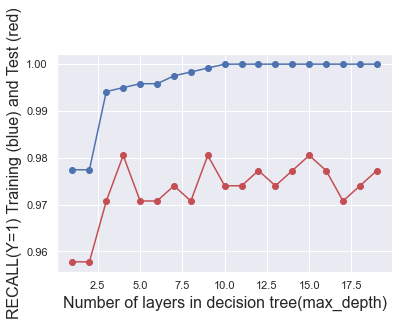

In [33]:
# try different numbers of layers to find the best one
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train,y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])
test_results=np.array(test_results)
train_results=np.array(train_results)
#generate plots of the performance of different layers 
def metric_plot(ylabel,layer,yptrain,yptest):
    fig=plt.figure()
    plt.plot(layer,yptrain,'o-',color="b")
    plt.plot(layer,yptest,'o-',color="r")
    plt.ylabel(ylabel+" Training (blue) and Test (red)",fontsize=16)
    plt.xlabel("Number of layers in decision tree(max_depth)",fontsize=16)
metric_plot("ACCURACY(Y=0)",test_results[:,0],train_results[:,1],test_results[:,1])
metric_plot("RECALL(Y=0)",test_results[:,0],train_results[:,2],test_results[:,2])
metric_plot("RECALL(Y=1)",test_results[:,0],train_results[:,3],test_results[:,3])

ACCURACY: 0.9868247694334651
NEGATIVE RECALL (Y=0): 0.9933481152993349
NEGATIVE PRECISION (Y=0): 0.9846153846153847
POSITIVE RECALL (Y=1): 0.9772727272727273
POSITIVE PRECISION (Y=1): 0.9901315789473685



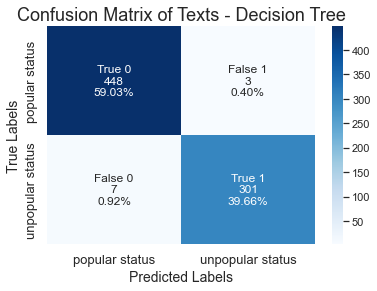

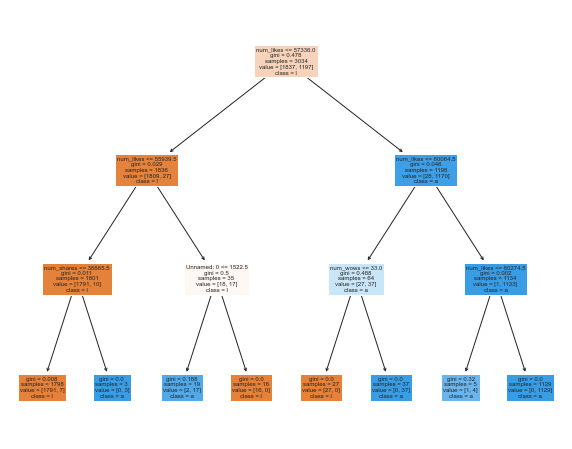

In [34]:
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(x_train,y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

#write a function to visualize the confusion matrix
def confusion_plot(y_data,y_pred):
    print(
        "ACCURACY: "+str(accuracy_score(y_data,y_pred))+"\n"+
        "NEGATIVE RECALL (Y=0): "+str(recall_score(y_data,y_pred,pos_label=0))+"\n"+
        "NEGATIVE PRECISION (Y=0): "+str(precision_score(y_data,y_pred,pos_label=0))+"\n"+
        "POSITIVE RECALL (Y=1): "+str(recall_score(y_data,y_pred,pos_label=1))+"\n"+
        "POSITIVE PRECISION (Y=1): "+str(precision_score(y_data,y_pred,pos_label=1))+"\n"
    )
    cf=confusion_matrix(y_data, y_pred)
    # customize the anno
    group_names = ["True 0","False 1","False 0","True 1"]
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #plot the heatmap
    fig=sns.heatmap(cf, annot=labels, fmt="", cmap='Blues')
    plt.title("Confusion Matrix of Texts - Decision Tree",fontsize=18)
    fig.set_xticklabels(["popular status","unpopular status"],fontsize=13)
    fig.set_yticklabels(["popular status","unpopular status"],fontsize=13)
    fig.set_xlabel("Predicted Labels",fontsize=14)
    fig.set_ylabel("True Labels",fontsize=14)
    plt.show()
confusion_plot(y_test,yp_test)

#write a function to visualize the tree
def plot_tree(model,X,Y):
    fig = plt.figure(figsize=(10,8))
    tree_vis= tree.plot_tree(model, feature_names=X.columns,class_names=Y.name,filled=True)
plot_tree(model,x_test,y_test)

Conclusion

Our model is quite good. It can correctly distinguish most samples and the accuracy is about 98%. Our goal is to classify that every twitter status of Trump will be liked by other or not. It seems that decision tree is one of the proper model for this dataset and for our prediction.

